# Redo fig6 analysis for new dataset

Would like to recreate the analysis for Fig6, but don't want to rerun all the video prediction stuff, so we need:
- obtain single trial level lick predictions from embedding from Aiden
- use these to split trials into categories
- rerun the binary classification using these trial labels

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import pandas as pd
import pickle
import ccf_analysis_utils
import functions as func
import os

In [2]:
auc_data = pickle.load(open('../data/auc_analysis.pickle', 'rb'))

In [3]:
gh_info, sess_info, sess_info_marker, sub_gh_info = auc_data

In [4]:
gh_info.keys()

dict_keys(['SC026_080519-521-25000-a1-leftALM', 'SC026_080519-521-25000-a2-rightALM', 'SC026_080519-521-25000-a3-rightMidbrain', 'SC026_080519-521-25000-a4-leftThalamus', 'SC026_080619-522-25000-a1-leftALM', 'SC026_080619-522-25000-a2-rightALM', 'SC026_080619-522-25000-a3-rightMidbrain', 'SC026_080619-522-25000-a4-leftThalamus', 'SC026_080819-523-25000-a1-leftALM', 'SC026_080819-523-25000-a3-rightMidbrain', 'SC026_080819-523-25000-a4-leftThalamus', 'SC027_072919-524-25000-a2-leftMidbrain', 'SC027_072919-524-25000-a3-rightMidbrain', 'SC027_073019-525-25000-a1-leftALM', 'SC027_073019-525-25000-a2-rightALM', 'SC027_073019-525-25000-a3-leftMidbrain', 'SC027_073019-525-25000-a4-rightMidbrain', 'SC027_073119-526-25000-a1-leftALM', 'SC027_073119-526-25000-a2-rightALM', 'SC027_073119-526-25000-a3-leftMidbrain', 'SC027_073119-526-25000-a4-rightMidbrain', 'SC027_080119-527-25000-a1-leftALM', 'SC027_080119-527-25000-a2-leftMidbrain', 'SC027_080119-527-25000-a3-rightMidbrain', 'SC027_080319-528-25

In [5]:
sess_info.keys()

dict_keys(['SC026_080519', 'SC026_080619', 'SC026_080819', 'SC027_072919', 'SC027_073019', 'SC027_073119', 'SC027_080119', 'SC027_080319', 'SC027_080419', 'SC030_100319', 'SC030_100419', 'SC030_100519', 'SC031_102119', 'SC031_102319', 'SC032_121819', 'SC032_121919', 'SC032_122019', 'SC033_111319', 'SC033_111419', 'SC033_111519', 'SC035_010720', 'SC035_010820', 'SC035_010920', 'SC035_011020', 'SC038_111919_s4', 'SC038_111919_s5', 'SC038_112019_s6', 'SC038_112019_s7', 'SC038_112119_s8', 'SC038_112119_s9', 'SC038_112219_s10', 'SC038_112219_s11', 'SC038_112319_s12', 'SC038_112319_s13', 'SC043_092220', 'SC043_092320', 'SC043_092420', 'SC043_092520', 'SC045_121020', 'SC045_121120', 'SC045_121420', 'SC045_121720', 'SC045_121820', 'SC048_010121', 'SC048_010321', 'SC048_010421', 'SC048_122520', 'SC048_122620', 'SC048_122920', 'SC048_123020', 'SC048_123120', 'SC049_010721', 'SC049_010821', 'SC049_011021', 'SC049_011121', 'SC049_011221', 'SC049_011321', 'SC050_022521', 'SC050_022621', 'SC050_0227

In [6]:
sess_info['SC026_080519'].keys()

dict_keys(['lick', 'success-lick0', 'success-lick1', 'success-trialType0', 'success-trialType1', 'success-lick', 'success-trialType', 'done'])

In [7]:
sess_info['SC026_080519']['lick'].keys()

dict_keys(['auc', 'acc', 'score', 'clf', 'can_do'])

In [8]:
sess_info['SC026_080519']['lick']['auc']['train'].shape

(232,)

In [9]:
sess_info['SC026_080819']['lick']['auc']['test'].shape

(232,)

In [10]:
cal4cat = pickle.load((open('../data/cal4cat-delay.pickle', 'rb')))
cal4cat.keys()

dict_keys(['SC026_080519', 'SC026_080619', 'SC026_080819', 'SC027_072919', 'SC027_073019', 'SC027_073119', 'SC027_080119', 'SC027_080319', 'SC027_080419', 'SC030_100319', 'SC030_100419', 'SC030_100519', 'SC031_102119', 'SC031_102319', 'SC032_121819', 'SC032_121919', 'SC032_122019', 'SC033_111319', 'SC033_111419', 'SC033_111519', 'SC035_010720', 'SC035_010820', 'SC035_010920', 'SC035_011020', 'SC038_111919_s4', 'SC038_111919_s5', 'SC038_112019_s6', 'SC038_112019_s7', 'SC038_112119_s8', 'SC038_112119_s9', 'SC038_112219_s10', 'SC038_112219_s11', 'SC038_112319_s12', 'SC038_112319_s13', 'SC043_092220', 'SC043_092320', 'SC043_092420', 'SC043_092520', 'SC045_121020', 'SC045_121120', 'SC045_121420', 'SC045_121720', 'SC045_121820', 'SC048_010121', 'SC048_010321', 'SC048_010421', 'SC048_122520', 'SC048_122620', 'SC048_122920', 'SC048_123020', 'SC048_123120', 'SC049_010721', 'SC049_010821', 'SC049_011021', 'SC049_011121', 'SC049_011221', 'SC049_011321', 'SC050_022521', 'SC050_022621', 'SC050_0227

In [11]:
cal4cat['SC026_080519'].keys()

dict_keys(['gh', 'baFull', 'ba', 'select', 'samp'])

In [12]:
cal4cat['SC026_080519']['select']['trialType'].shape

(465,)

In [13]:
cal4cat['SC027_072919']['select']['trialType'].shape

(207,)

In [14]:
cal4cat['SC026_080519']['samp'].keys()

dict_keys([(0, 0), (0, 1), (1, 0), (1, 1)])

In [29]:
cal4cat['SC035_010820']['samp'][(0,1)].shape

(355,)

In [16]:
cal4cat['SC035_010820']['samp'][(0,1)]

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False,

In [15]:
ephys_data = pickle.load(open('../CodeForGeneratingR2/ephys/preprocessed/stride3_bw40/SC035_20200108_34/2_right_Medulla.pickle', 'rb'))

In [16]:
ephys_data['fr'].shape

(1765, 640, 87)

In [17]:
old_ephys = pickle.load(open('../data/SC035_010820-589-25000-a2-rightMedulla.pickle', 'rb'))

In [18]:
uids = np.concatenate([old_ephys['uid'][split] for split in ['train', 'val', 'test']])

KeyError: 'success'

In [23]:
trial_inds = np.array([int(uid.split('-')[-1])-1 for uid in uids])


In [26]:
success = ephys_data['correctness'][trial_inds]

In [27]:
uids_good = uids[success == 1]
print(len(uids_good))

355


In [19]:
old_ephys.keys()

dict_keys(['fr', 'ccf-coordinate', 'ccf-label', 'ccf-unit_id', 'uid', 'bw', 'stride'])

In [49]:
len(old_ephys['uid']['train'])+len(old_ephys['uid']['test'])

360

Have to figure out the trial uid-s for the `cal4cat['SC035_010820']['samp'][(0,1)]` predictions, because it does not align with the raw nor the other filtered trial lists.

In [30]:
keys = list(cal4cat.keys())

for k in keys:
    if '_s' in k:
        print(k)

SC038_111919_s4
SC038_111919_s5
SC038_112019_s6
SC038_112019_s7
SC038_112119_s8
SC038_112119_s9
SC038_112219_s10
SC038_112219_s11
SC038_112319_s12
SC038_112319_s13


In [ ]:
import pickle
import numpy as np
import os
import glob

old_ephys_folder = '/scratch/users/kurgyis/data/aiden_fr_files/stride17_bw40/'
new_ephys_folder = '/oak/stanford/groups/shauld/kurgyis/data/Map_ULTIMATE_preprocessed/stride3_bw40/'

cal4cat_filename = '/oak/stanford/groups/shauld/kurgyis/data/AUC_analysis/cal4cat-delay.pickle'
save_filename = '/oak/stanford/groups/shauld/kurgyis/data/AUC_analysis/trial_type_labels.pickle'

cal4cat = pickle.load(open(cal4cat_filename, 'rb'))

save_dict = {}

for short_sess_name in cal4cat.keys():
    print(short_sess_name)
    search_pattern = os.path.join(old_ephys_folder, short_sess_name) + '*'

    # List all files matching the pattern
    matching_files = glob.glob(search_pattern)

    # Filter to include only files
    matching_files = [file for file in matching_files if os.path.isfile(file)]

    if len(matching_files) == 0:
        print('No files found')
        continue

    # Any file is good
    old_ephys_file = matching_files[0]
    old_ephys_data = pickle.load(open(old_ephys_file, 'rb'))

    uids = np.concatenate([old_ephys_data['uid'][split] for split in ['train', 'val', 'test']])
    trial_inds = np.array([int(uid.split('-')[-1])-1 for uid in uids])

    new_sess_name = short_sess_name.split('_')[0] + '_20' + short_sess_name.split('_')[1][4:] + short_sess_name.split('_')[1][:4]
    if '_s' in short_sess_name:
        new_sess_name += '_' + short_sess_name.split('_s')[1]

    new_ephys_search_pattern = os.path.join(new_ephys_folder, new_sess_name) + '*'

    new_ephys_matching_files = glob.glob(new_ephys_search_pattern)

    new_ephys_matching_folders = [path for path in new_ephys_matching_files if os.path.isdir(path)]

    #make sure there is only one matching folder

    if len(new_ephys_matching_folders) != 1:
        print('No or multiple folders found')
        continue

    new_ephys_session_folder = new_ephys_matching_folders[0]
    long_session_name = new_ephys_session_folder.split('/')[-1]
    new_ephys_session_files = glob.glob(os.path.join(new_ephys_session_folder, '*.pickle'))

    if len(new_ephys_session_files) == 0:
        print('No files found')
        continue

    new_ephys_file = new_ephys_session_files[0]
    new_ephys_data = pickle.load(open(new_ephys_file, 'rb'))

    success = new_ephys_data['correctness'][trial_inds]

    uids_good = uids[success == 1]
    trial_inds_good = np.array([int(uid.split('-')[-1])-1 for uid in uids_good])

    save_dict[long_session_name] = {
        'uids': uids_good,
        'trial_inds': trial_inds_good,
        'trial_labels': cal4cat[short_sess_name]['samp']
    }

pickle.dump(save_dict, open(save_filename, 'wb'))
    

In [2]:
trial_type_label_data = pickle.load(open('../data/trial_type_labels.pickle', 'rb'))

In [3]:
trial_type_label_data.keys()

dict_keys(['SC026_20190805_21', 'SC026_20190806_22', 'SC026_20190808_23', 'SC027_20190729_17', 'SC027_20190730_18', 'SC027_20190731_19', 'SC027_20190801_20', 'SC027_20190803_21', 'SC027_20190804_22', 'SC030_20191003_33', 'SC030_20191004_34', 'SC030_20191005_35', 'SC031_20191021_48', 'SC031_20191023_50', 'SC032_20191218_55', 'SC032_20191219_56', 'SC032_20191220_57', 'SC033_20191113_32', 'SC033_20191114_33', 'SC033_20191115_34', 'SC035_20200107_33', 'SC035_20200108_34', 'SC035_20200109_35', 'SC035_20200110_36', 'SC038_20191119_4', 'SC038_20191119_5', 'SC038_20191120_6', 'SC038_20191120_7', 'SC038_20191121_8', 'SC038_20191121_9', 'SC038_20191122_10', 'SC038_20191122_11', 'SC038_20191123_12', 'SC038_20191123_13', 'SC043_20200922_24', 'SC043_20200923_25', 'SC043_20200924_26', 'SC043_20200925_27', 'SC045_20201210_18', 'SC045_20201211_19', 'SC045_20201214_21', 'SC045_20201217_22', 'SC045_20201218_23', 'SC048_20210101_16', 'SC048_20210103_17', 'SC048_20210104_18', 'SC048_20201225_11', 'SC048_2

In [4]:
trial_type_label_data['SC026_20190805_21'].keys()

dict_keys(['uids', 'trial_inds', 'trial_labels'])

In [11]:
trial_type_label_data['SC026_20190805_21']['trial_inds']

array([468, 189, 409, 309, 181, 507, 103, 368,  62, 145, 537, 237,  31,
       286, 243, 111, 461, 198, 323, 272, 102, 231, 428, 180,  67, 387,
       559, 466, 318, 512, 117, 288, 289, 558, 161, 501, 411, 356,  11,
       302, 354,  32, 344, 417, 100, 330, 460, 424, 370,  15, 340,  35,
       415, 401,  77, 314, 386, 227, 438, 332,  29, 419, 322, 141, 351,
        95,  68,  21, 116, 328,  69, 515, 362, 412, 343,  45,  99, 454,
        28, 435, 163, 517, 473, 310, 140, 306, 366, 276, 347, 497, 204,
       308, 353, 462, 475, 194, 447, 529, 371, 132,  73,  34,  70,  86,
       251, 389, 491,  52, 226,  78, 506, 267, 364, 105,  49, 134,  54,
       476, 338, 348, 270, 169, 488, 273, 254, 385, 528, 437, 557, 121,
       242, 222, 250, 556, 552, 160, 555, 221, 122, 391, 236, 108, 202,
        22, 358,  13, 374, 527, 305, 345,  76, 503, 471,  12, 278,  24,
       147, 441, 188, 234,  61, 297, 342, 470, 151, 216, 352, 213, 199,
       407,  20, 252, 535, 458, 327, 410, 223, 174, 400, 256,  5

In [12]:
trial_type_label_data['SC026_20190805_21']['trial_labels'][(0,1)]

array([False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True,  True, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

In [39]:
def calculate_multi_neuron_auc(fr_mean, group1_labels, group2_labels, cv = 20, concat_folds = False):

    n_neurons = fr_mean.shape[1]
    fr1 = fr_mean[group1_labels]
    fr2 = fr_mean[group2_labels]

    _fr = np.concatenate([fr1, fr2], axis = 0)
    _labels = np.concatenate([np.zeros(fr1.shape[0]), np.ones(fr2.shape[0])])

    auc_array_test = np.zeros(n_neurons)
    auc_array_train = np.zeros(n_neurons)

    for ii in range(n_neurons):
        auc_test, auc_train = calculate_single_neuron_auc_from_classification(_fr[:,ii].reshape(-1, 1), _labels, cv = cv, concat_folds = concat_folds)
        auc_array_test[ii] = auc_test
        auc_array_train[ii] = auc_train

    return auc_array_test, auc_array_train


from sklearn.linear_model import RidgeClassifierCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

def random_split(trial_labels, cv = 20, random_seed = 42):
    np.random.seed(random_seed)
    n_trials = len(trial_labels)
    trial_inds = np.arange(n_trials)
    np.random.shuffle(trial_inds)
    cv_inds = np.array_split(trial_inds, cv)

    split_inds_dict = {'train':[], 'test':[]}
    for ii in range(cv):
        train_inds = np.concatenate([cv_inds[jj] for jj in range(cv) if jj != ii])
        test_inds = cv_inds[ii]
        split_inds_dict['train'].append(train_inds)
        split_inds_dict['test'].append(test_inds)

    return split_inds_dict


def calculate_single_neuron_auc_from_classification(
    fr_mean, 
    trial_labels, 
    cv = 20, 
    scale = False, 
    classifier = RidgeClassifierCV, 
    class_weight = 'balanced', 
    trial_min = 21, 
    train_min = 10,
    test_min = 1,
    lda_n_components = None,
    random_seed = 42,
    concat_folds = False,
    return_scores = False):

    _seed = random_seed

    n_categories = len(np.unique(trial_labels))
    if n_categories != 2:
        raise ValueError('Only binary classification is supported for now. Number of categories: {}'.format(n_categories))

    if np.sum(trial_labels == np.unique(trial_labels)[0]) < trial_min or np.sum(trial_labels == np.unique(trial_labels)[1]) < trial_min:
        raise ValueError('At least one of the classes has fewer than {} trials'.format(trial_min))

    not_valid_split = True
    while not_valid_split:
        split_inds_dict = random_split(trial_labels, cv = cv, random_seed = _seed)
        not_valid_split = False
        for ii in range(cv):
            train_inds = split_inds_dict['train'][ii]
            test_inds = split_inds_dict['test'][ii]
            if np.sum(trial_labels[train_inds] == np.unique(trial_labels)[0]) < train_min or np.sum(trial_labels[train_inds] == np.unique(trial_labels)[1]) < train_min:
                not_valid_split = True
                _seed += 1
            if np.sum(trial_labels[test_inds] == np.unique(trial_labels)[0]) < test_min or np.sum(trial_labels[test_inds] == np.unique(trial_labels)[1]) < test_min:
                not_valid_split = True
                _seed += 1

    
    model = classifier(class_weight = class_weight)
    test_scores = []
    train_scores = []

    for ii in range(cv):
        train_inds = split_inds_dict['train'][ii]
        test_inds = split_inds_dict['test'][ii]

        if scale:
            scaler = StandardScaler()
            fr_train = scaler.fit_transform(fr_mean[train_inds])
            fr_test = scaler.transform(fr_mean[test_inds])
        else:
            fr_train = fr_mean[train_inds]
            fr_test = fr_mean[test_inds]

        model.fit(fr_train, trial_labels[train_inds])
        
        test_scores.append(model.decision_function(fr_test))
        train_scores.append(model.decision_function(fr_train))

    if concat_folds:
        test_scores = np.concatenate(test_scores)
        train_scores = np.concatenate(train_scores)
        test_labels = np.concatenate([trial_labels[split_inds_dict['test'][ii]] for ii in range(cv)])
        train_labels = np.concatenate([trial_labels[split_inds_dict['train'][ii]] for ii in range(cv)])

        auc_test = roc_auc_score(test_labels, test_scores)
        auc_train = roc_auc_score(train_labels, train_scores)

    else:
        auc_test = np.mean([roc_auc_score(trial_labels[split_inds_dict['test'][ii]], test_scores[ii]) for ii in range(cv)])
        auc_train = np.mean([roc_auc_score(trial_labels[split_inds_dict['train'][ii]], train_scores[ii]) for ii in range(cv)])
    
    if return_scores:
        return auc_test, auc_train, test_scores, train_scores
    else:
        return auc_test, auc_train

    


In [40]:
ephys_data.keys()

dict_keys(['sess_name', 'area', 'bin_centers', 'fr', 'spike_times', 'neuron_info', 'unit_qc', 'ccf_coordinate', 'ccf_label', 'ccf_unit_id', 'auto_learn_trials', 'early_lick_trials', 'auto_water_trials', 'free_water_trials', 'lick_directions', 'lick_times', 'gocue_time', 'correctness', 'delay_period', 'sample_period', 'stimulation', 'trial_type'])

In [41]:
fr = ephys_data['fr']
tt = ephys_data['bin_centers']
sess_name = ephys_data['sess_name']

delay_avg_fr = np.mean(fr[(tt >= -1.2)*(tt < 0.) == 1], axis = 0)

print(delay_avg_fr.shape)

(640, 87)


In [56]:
ephys_data['ccf_coordinate'].shape

(87, 3)

In [42]:
trial_type_label_data[sess_name].keys()

dict_keys(['uids', 'trial_inds', 'trial_labels'])

In [43]:
aligned_fr = delay_avg_fr[trial_type_label_data[sess_name]['trial_inds']]

In [50]:
# trial_type 

trial_type_auc_test = np.zeros(aligned_fr.shape[1])
trial_type_auc_train = np.zeros(aligned_fr.shape[1])

for l in [0,1]:
    test_auc, train_auc = calculate_multi_neuron_auc(aligned_fr, trial_type_label_data[sess_name]['trial_labels'][(0,l)], trial_type_label_data[sess_name]['trial_labels'][(1,l)])
    trial_type_auc_test += test_auc/2
    trial_type_auc_train += train_auc/2

# motor_type

motor_type_auc_test = np.zeros(aligned_fr.shape[1])
motor_type_auc_train = np.zeros(aligned_fr.shape[1])

for l in [0,1]:
    test_auc, train_auc = calculate_multi_neuron_auc(aligned_fr, trial_type_label_data[sess_name]['trial_labels'][(l,0)], trial_type_label_data[sess_name]['trial_labels'][(l,1)])
    motor_type_auc_test += test_auc/2
    motor_type_auc_train += train_auc/2





(0, 1)

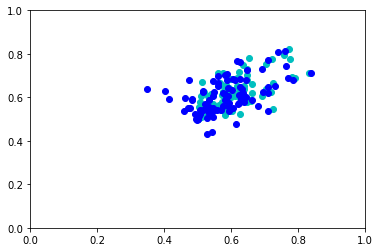

In [51]:
plt.plot(trial_type_auc_train,motor_type_auc_train, 'co')
plt.plot(trial_type_auc_test,motor_type_auc_test, 'bo')
plt.xlim([0,1])
plt.ylim([0,1])

In [52]:
# trial_type 

cf_trial_type_auc_test = np.zeros(aligned_fr.shape[1])
cf_trial_type_auc_train = np.zeros(aligned_fr.shape[1])

for l in [0,1]:
    test_auc, train_auc = calculate_multi_neuron_auc(aligned_fr, trial_type_label_data[sess_name]['trial_labels'][(0,l)], trial_type_label_data[sess_name]['trial_labels'][(1,l)], concat_folds = True)
    cf_trial_type_auc_test += test_auc/2
    cf_trial_type_auc_train += train_auc/2

# motor_type

cf_motor_type_auc_test = np.zeros(aligned_fr.shape[1])
cf_motor_type_auc_train = np.zeros(aligned_fr.shape[1])

for l in [0,1]:
    test_auc, train_auc = calculate_multi_neuron_auc(aligned_fr, trial_type_label_data[sess_name]['trial_labels'][(l,0)], trial_type_label_data[sess_name]['trial_labels'][(l,1)], concat_folds = True)
    cf_motor_type_auc_test += test_auc/2
    cf_motor_type_auc_train += train_auc/2





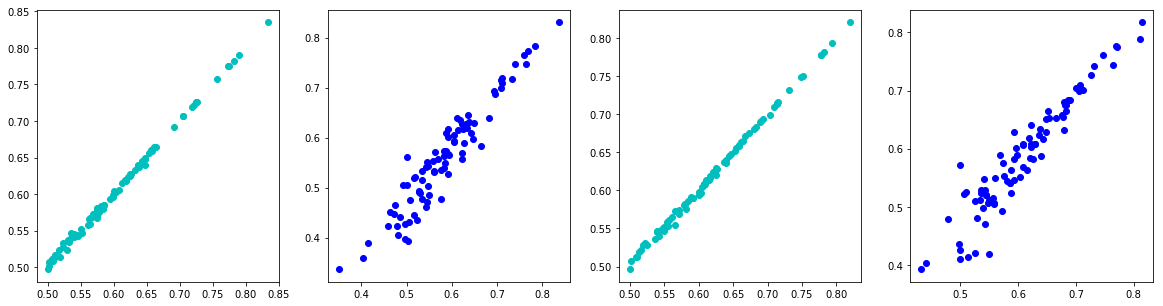

In [53]:
plt.subplots(1,4 ,figsize = (20,5))
plt.subplot(1,4,1)
plt.plot(trial_type_auc_train,cf_trial_type_auc_train, 'co')

plt.subplot(1,4,2)
plt.plot(trial_type_auc_test,cf_trial_type_auc_test, 'bo')

plt.subplot(1,4,3)
plt.plot(motor_type_auc_train,cf_motor_type_auc_train, 'co')

plt.subplot(1,4,4)
plt.plot(motor_type_auc_test,cf_motor_type_auc_test, 'bo')

In [54]:
os.listdir('../data/')

['SC035_20200108_34_5_5_0_embedding.pkl',
 'SC043_20200924_26_train_test_split_inds.pickle',
 'SC035_20200108_34_fold_trial_inds.pickle',
 'r2_data_dict_marker_smallwindow_subtract_pertimeavg.pkl',
 'r2_scores_SC035_20200108_34_5_1_0.pkl',
 'trial_type_labels.pickle',
 'session_label_match.csv',
 'ccf_coords_with_annotations.csv',
 'neuron_number_dict.pickle',
 'mousebrainontology_2.csv',
 'single_example_neuron_data.pkl',
 'pred_new.tar',
 'ALM.png',
 'SC035_010820-589-25000-a2-rightMedulla.pickle',
 'area2anno.json',
 'Annotation_new_10_ds222_32bit.tif',
 'noisy_ccf_labels_coords.pkl',
 'pred.tar',
 'r2_data_dict_smallwindows_v3.pkl',
 'nn_and_shuffle_r2_thalamus_subnuclei.pkl',
 'r2_data_dict_expanded_smallwindow_subtract_pertimeavg.pkl',
 'Annotation_new_10_ds222_16bit.tif',
 'ccf_data_maybe',
 'cal4cat-delay.pickle',
 'auc_analysis.pickle',
 'ccf_dict_for_fig6.pickle',
 'AllenRefVolCoronal_10_ds222.tif',
 'r2_scores_SC035_20200110_36_5_1_0.pkl',
 '576_ant_res=20um_PTITtract_masked

In [4]:
filename = '../data/auc_delay_data.pickle'

auc_delay_data = pickle.load(open(filename, 'rb'))

In [5]:
auc_delay_data.keys()

dict_keys(['motor_type_auc_test', 'motor_type_auc_train', 'trial_type_auc_test', 'trial_type_auc_train', 'ccf_unit_ids', 'ccf_labels', 'ccf_coords', 'session_names'])

In [6]:
auc_delay_data['motor_type_auc_test'].shape 

(34196,)

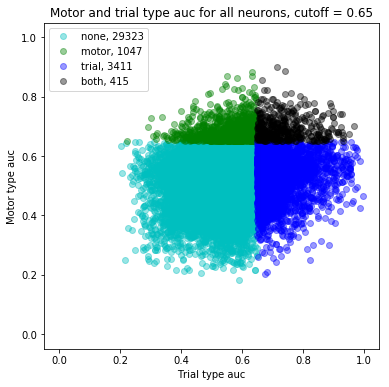

In [19]:
cutoff = 0.65
motor_mask = np.logical_and(auc_delay_data['motor_type_auc_test'] >= cutoff, auc_delay_data['trial_type_auc_test'] < cutoff)
trial_mask = np.logical_and(auc_delay_data['trial_type_auc_test'] >= cutoff, auc_delay_data['motor_type_auc_test'] < cutoff)
both_mask = np.logical_and(auc_delay_data['trial_type_auc_test'] >= cutoff, auc_delay_data['motor_type_auc_test'] >= cutoff)
none_mask = np.logical_and(auc_delay_data['trial_type_auc_test'] < cutoff, auc_delay_data['motor_type_auc_test'] < cutoff)

masks = [none_mask, motor_mask, trial_mask, both_mask]
names = ['none', 'motor', 'trial', 'both']
colors = ['c', 'g', 'b', 'k']

plt.figure(figsize = (6,6))

plt.title('Motor and trial type auc for all neurons, cutoff = %.2f'%cutoff)
plt.xlabel('Trial type auc')
plt.ylabel('Motor type auc')

for i, _mask in enumerate(masks):
    plt.plot(auc_delay_data['trial_type_auc_test'][_mask],auc_delay_data['motor_type_auc_test'][_mask], 'o', color = colors[i], label = '%s, %d'%(names[i], np.sum(_mask)), alpha = 0.4)
    plt.legend()

plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)

plt.savefig('../figs/fig6/new_motor_trial_type_auc.png', dpi = 300)